In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

In [2]:
def f(x,y,mode='original'):
    if mode == 'original':
        return x**2 + 2*y**2
    else:#mode == 'modified'
        return x**2 + y**2
    
def gradient(x,y,mode ='original'):
    if mode == 'original':
        return np.array([2*x , 4*y])
    else:
        return np.array([2*x,2*y])
    


In [3]:
#gradient decent implementation 
def gradient_decent_2d(x0,y0,lr,mode='original',max_iter= 100 , epsilon =  1e-6):
    point = np.array([x0,y0])

    history = [point.copy()] #store trarejection

    for i in range(max_iter):
        grad = gradient(point[0], point[1],mode)

        point_new  = point - lr * grad
        history.append(point_new.copy())

        if i % 10 == 0 :
            print(f"Iteration {i}: (x, y) = ({point_new[0]:.6f}, {point_new[1]:.6f}), "
                  f"f(x, y) = {f(point_new[0], point_new[1], mode):.6f}")
        if np.linalg.norm(grad) < epsilon:
            print(f"Converged at iteration {i+1}: (x, y) = ({point_new[0]:.6f}, {point_new[1]:.6f}), "
                  f"f(x, y) = {f(point_new[0], point_new[1], mode):.6f}")
            break 
        point = point_new

    return np.array(history)           


In [5]:
#Run GD
x0, y0 = 4.0, 2.0
eta = 0.1
history = gradient_decent_2d(x0, y0, eta, mode='original')

Iteration 0: (x, y) = (3.200000, 1.200000), f(x, y) = 13.120000
Iteration 10: (x, y) = (0.343597, 0.007256), f(x, y) = 0.118164
Iteration 20: (x, y) = (0.036893, 0.000044), f(x, y) = 0.001361
Iteration 30: (x, y) = (0.003961, 0.000000), f(x, y) = 0.000016
Iteration 40: (x, y) = (0.000425, 0.000000), f(x, y) = 0.000000
Iteration 50: (x, y) = (0.000046, 0.000000), f(x, y) = 0.000000
Iteration 60: (x, y) = (0.000005, 0.000000), f(x, y) = 0.000000
Iteration 70: (x, y) = (0.000001, 0.000000), f(x, y) = 0.000000
Converged at iteration 73: (x, y) = (0.000000, 0.000000), f(x, y) = 0.000000


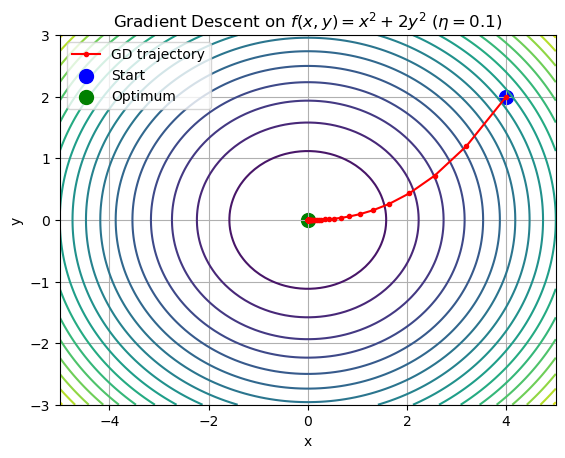

In [6]:
# Contour plot (You can just coppy this code for your exercise if its too hard)
# Create blue circle line
x = np.linspace(-5, 5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, mode='original')
plt.contour(X, Y, Z, levels=20, cmap='viridis')

# Plot position of x in each step
plt.plot(history[:, 0], history[:, 1], 'r.-', label='GD trajectory')
plt.scatter(history[0, 0], history[0, 1], color='blue', s=100, label='Start')
plt.scatter(0, 0, color='green', s=100, label='Optimum')

# Extra infor
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on $f(x, y) = x^2 + 2y^2$ ($\\eta = 0.1$)')
plt.legend()
plt.grid(True)
plt.show()

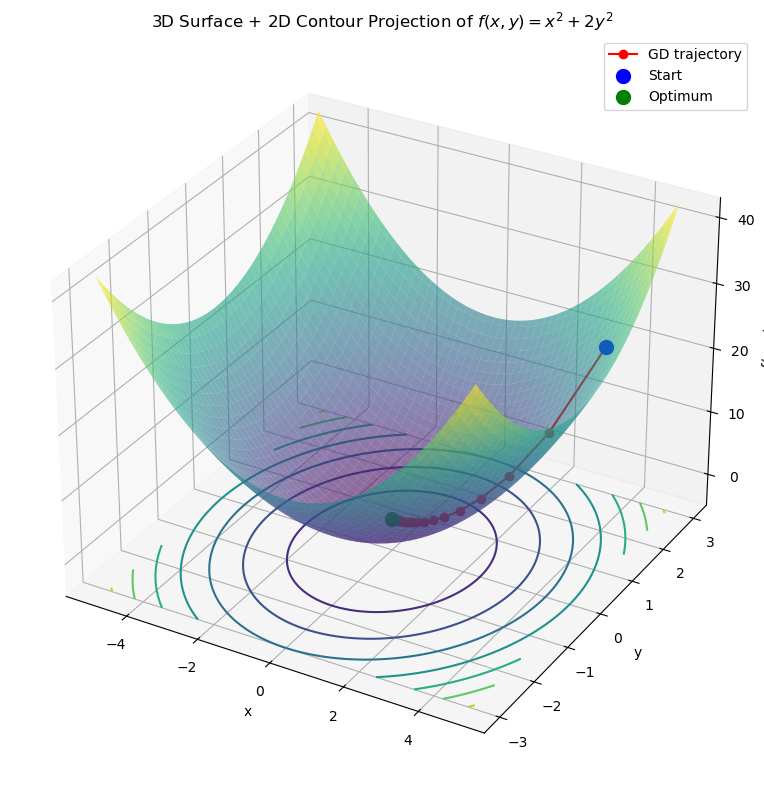

In [7]:
z_path = f(history[:, 0], history[:, 1])  # Compute z for the path

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot contour on the "floor" (XY plane)
ax.contour(X, Y, Z, zdir='z', offset=np.min(Z)-5, cmap='viridis')

# Plot the trajectory
ax.plot(history[:, 0], history[:, 1], z_path, 'r.-', markersize=12, label='GD trajectory')
ax.scatter(history[0, 0], history[0, 1], z_path[0], color='blue', s=100, label='Start')
ax.scatter(0, 0, 0, color='green', s=100, label='Optimum')

# Customize axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface + 2D Contour Projection of $f(x, y) = x^2 + 2y^2$')

# Set z limits so contour shows clearly
ax.set_zlim(np.min(Z)-5, np.max(Z))

# Rotate view (elev: up/down, azim: around)
# ax.view_init(elev=35, azim=90)

ax.legend()
plt.tight_layout()
plt.show()

In [11]:
lrs = [0.01 , 0.4]
threshold = 0.01
print("\n Convergence speed Comparisison (||x_t,y_t|| < 0.01)")
for lr in lrs:
    iters = 100
    print(f"Learning rate η = {lr}: {iters} iterations")


 Convergence speed Comparisison (||x_t,y_t|| < 0.01)
Learning rate η = 0.01: 100 iterations
Learning rate η = 0.4: 100 iterations


In [13]:
history_mod = gradient_decent_2d(x0,y0,lr =0.4 , mode = 'modified')

Iteration 0: (x, y) = (0.800000, 0.400000), f(x, y) = 0.800000
Iteration 10: (x, y) = (0.000000, 0.000000), f(x, y) = 0.000000
Converged at iteration 11: (x, y) = (0.000000, 0.000000), f(x, y) = 0.000000


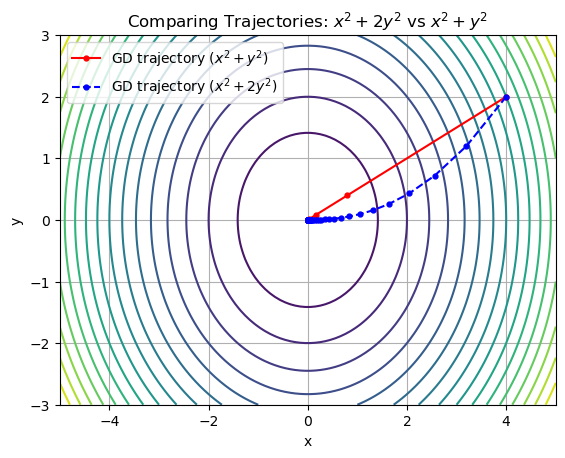

In [14]:
# Bonus Visualization
Z_mod = f(X, Y, mode='modified')
plt.contour(X, Y, Z_mod, levels=20, cmap='viridis')
plt.plot(history_mod[:, 0], history_mod[:, 1], 'r.-', markersize=7, label='GD trajectory ($x^2 + y^2$)')
plt.plot(history[:, 0], history[:, 1], 'b.--', markersize=7, label='GD trajectory ($x^2 + 2y^2$)')
# plt.scatter(history[0, 0], history[0, 1], color='blue', s=150, label='Start')
# plt.scatter(0, 0, color='green', s=150, label='Optimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparing Trajectories: $x^2 + 2y^2$ vs $x^2 + y^2$')
plt.legend()
plt.grid(True)
plt.show()